<a href="https://colab.research.google.com/github/MAristyaP/PCVK_Genap_2021/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Make an image histogram like the following histogram output based on the flowchart below :
(Use image lena.jpg)

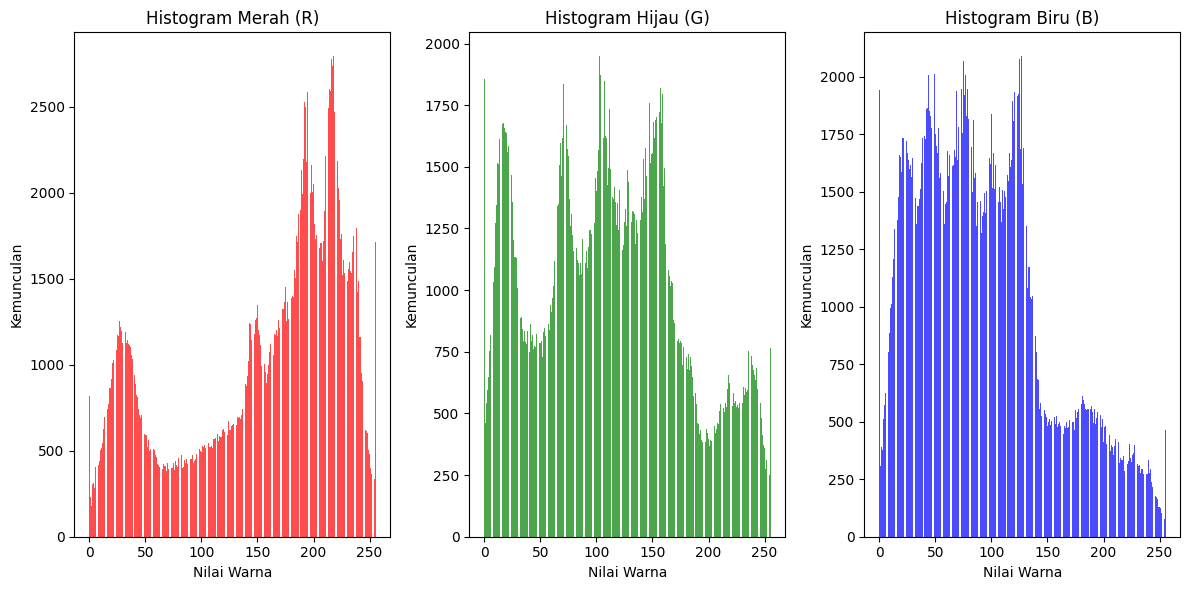

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
original = cv.imread('/content/drive/MyDrive/Images/lena.jpg')

# Ubah citra ke dalam skema warna RGB
citra_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)

# Pisahkan saluran warna R, G, dan B
r, g, b = cv.split(citra_rgb)

# Hitung histogram untuk setiap saluran warna R, G, dan B
hist_r = cv.calcHist([r], [0], None, [256], [0, 256])
hist_g = cv.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv.calcHist([b], [0], None, [256], [0, 256])

# Membuat tiga subplot
plt.figure(figsize=(12, 6))

# Subplot untuk histogram Merah (R)
plt.subplot(131)
plt.bar(np.arange(256), hist_r[:, 0], color='red', alpha=0.7, label='Merah (R)')
plt.title('Histogram Merah (R)')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Subplot untuk histogram Hijau (G)
plt.subplot(132)
plt.bar(np.arange(256), hist_g[:, 0], color='green', alpha=0.7, label='Hijau (G)')
plt.title('Histogram Hijau (G)')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Subplot untuk histogram Biru (B)
plt.subplot(133)
plt.bar(np.arange(256), hist_b[:, 0], color='blue', alpha=0.7, label='Biru (B)')
plt.title('Histogram Biru (B)')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Tampilkan plot
plt.tight_layout()
plt.show()

4. After working on question no. 3, make the same image histogram but use the library
that is owned by NumPy, namely " histogram ". Compare the results. Does the
output appear the same?

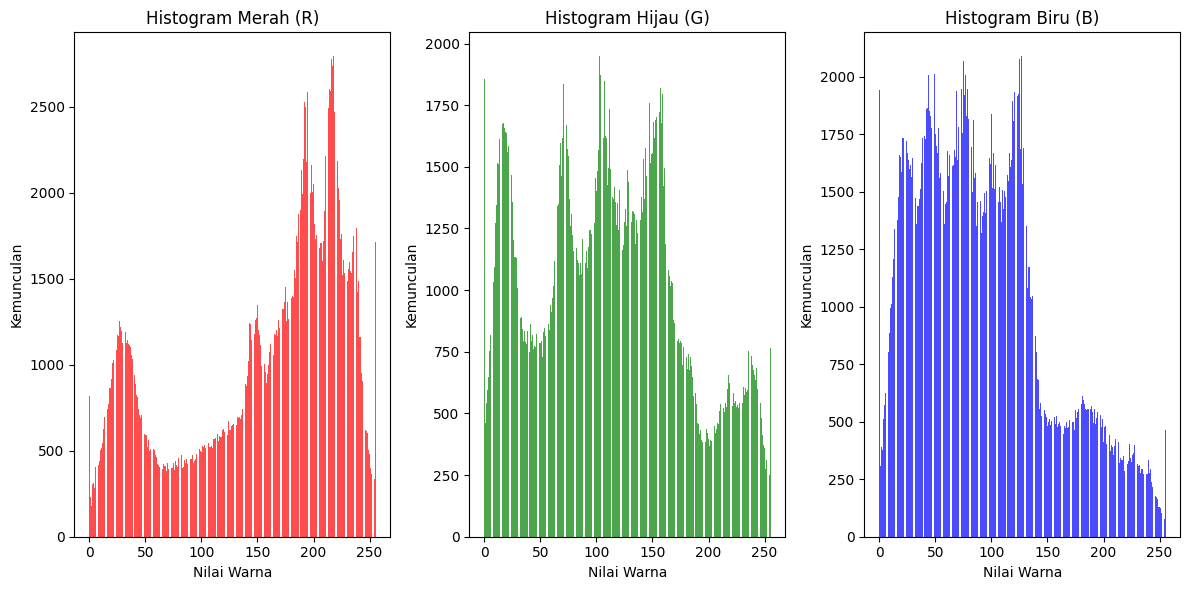

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
original = cv.imread('/content/drive/MyDrive/Images/lena.jpg')

# Ubah citra ke dalam skema warna RGB
citra_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)

# Pisahkan saluran warna R, G, dan B
r, g, b = cv.split(citra_rgb)

# Membuat tiga subplot
plt.figure(figsize=(12, 6))

# Subplot untuk histogram Merah (R)
plt.subplot(131)
hist_r, bins_r = np.histogram(r.ravel(), bins=256, range=(0, 256))
plt.bar(np.arange(256), hist_r, color='red', alpha=0.7, label='Merah (R)')
plt.title('Histogram Merah (R)')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Subplot untuk histogram Hijau (G)
plt.subplot(132)
hist_g, bins_g = np.histogram(g.ravel(), bins=256, range=(0, 256))
plt.bar(np.arange(256), hist_g, color='green', alpha=0.7, label='Hijau (G)')
plt.title('Histogram Hijau (G)')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Subplot untuk histogram Biru (B)
plt.subplot(133)
hist_b, bins_b = np.histogram(b.ravel(), bins=256, range=(0, 256))
plt.bar(np.arange(256), hist_b, color='blue', alpha=0.7, label='Biru (B)')
plt.title('Histogram Biru (B)')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Tampilkan plot
plt.tight_layout()
plt.show()

5. Make an image histogram such as the output equalization histogram and also the
image display before and after the following equalization histogram process based on
the flowchart below : (Use image lena_lc .jpg)

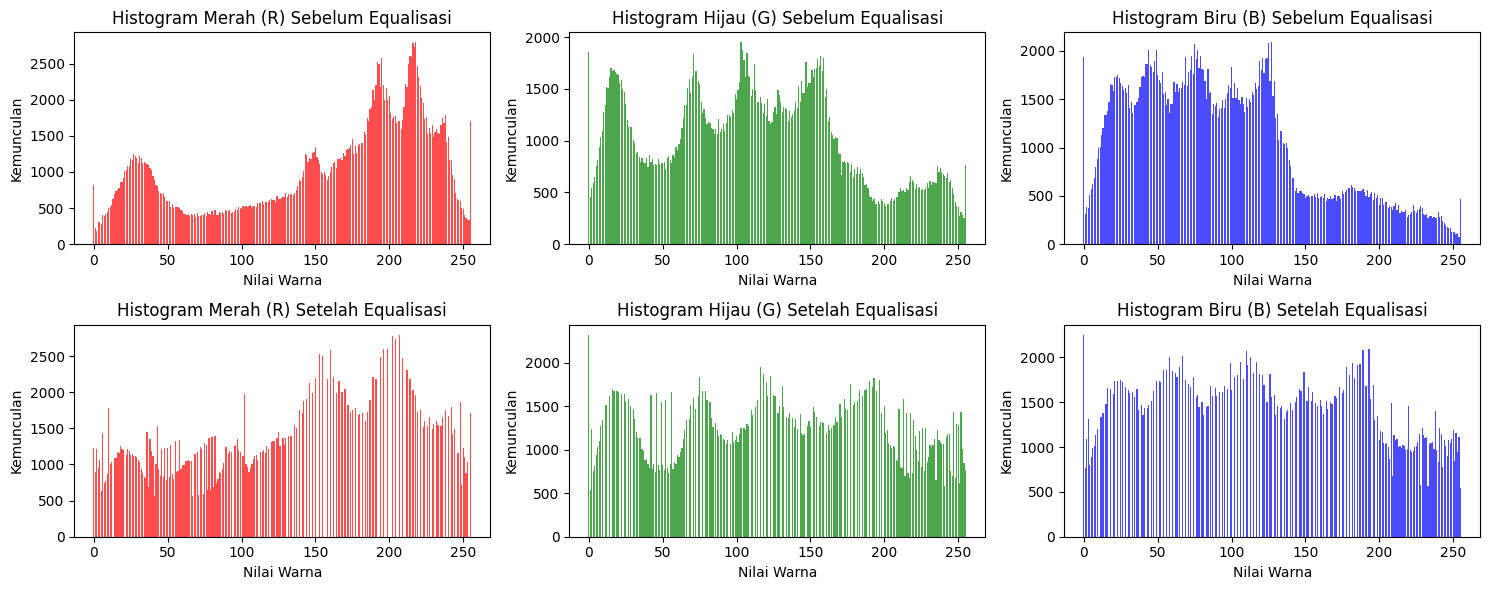

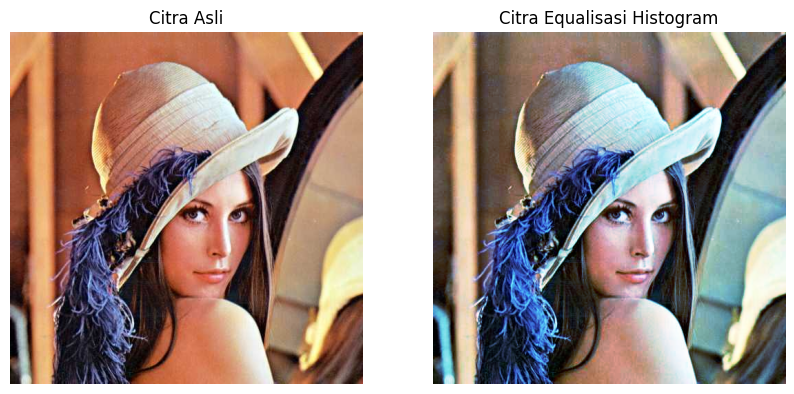

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
original = cv.imread('/content/drive/MyDrive/Images/lena.jpg')

# Ubah citra ke dalam skema warna RGB
citra_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)

# Pisahkan saluran warna R, G, dan B
r, g, b = cv.split(citra_rgb)

# Hitung histogram untuk setiap saluran warna R, G, dan B menggunakan NumPy
hist_r, bins_r = np.histogram(r, bins=256, range=(0, 256))
hist_g, bins_g = np.histogram(g, bins=256, range=(0, 256))
hist_b, bins_b = np.histogram(b, bins=256, range=(0, 256))

# Membuat tiga subplot untuk histogram
plt.figure(figsize=(15, 6))

# Subplot untuk histogram Merah (R) sebelum equalisasi
plt.subplot(231)
plt.bar(np.arange(256), hist_r, color='red', alpha=0.7, label='Merah (R)')
plt.title('Histogram Merah (R) Sebelum Equalisasi')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Subplot untuk histogram Hijau (G) sebelum equalisasi
plt.subplot(232)
plt.bar(np.arange(256), hist_g, color='green', alpha=0.7, label='Hijau (G)')
plt.title('Histogram Hijau (G) Sebelum Equalisasi')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Subplot untuk histogram Biru (B) sebelum equalisasi
plt.subplot(233)
plt.bar(np.arange(256), hist_b, color='blue', alpha=0.7, label='Biru (B)')
plt.title('Histogram Biru (B) Sebelum Equalisasi')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Equalisasi histogram untuk setiap saluran warna R, G, dan B
equalized_r = cv.equalizeHist(r)
equalized_g = cv.equalizeHist(g)
equalized_b = cv.equalizeHist(b)

# Gabungkan kembali saluran warna yang sudah diubah
equalized_image = cv.merge([equalized_r, equalized_g, equalized_b])

# Hitung histogram untuk citra yang sudah diubah
equalized_hist_r, _ = np.histogram(equalized_r, bins=256, range=(0, 256))
equalized_hist_g, _ = np.histogram(equalized_g, bins=256, range=(0, 256))
equalized_hist_b, _ = np.histogram(equalized_b, bins=256, range=(0, 256))

# Subplot untuk histogram Merah (R) setelah equalisasi
plt.subplot(234)
plt.bar(np.arange(256), equalized_hist_r, color='red', alpha=0.7, label='Merah (R)')
plt.title('Histogram Merah (R) Setelah Equalisasi')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Subplot untuk histogram Hijau (G) setelah equalisasi
plt.subplot(235)
plt.bar(np.arange(256), equalized_hist_g, color='green', alpha=0.7, label='Hijau (G)')
plt.title('Histogram Hijau (G) Setelah Equalisasi')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Subplot untuk histogram Biru (B) setelah equalisasi
plt.subplot(236)
plt.bar(np.arange(256), equalized_hist_b, color='blue', alpha=0.7, label='Biru (B)')
plt.title('Histogram Biru (B) Setelah Equalisasi')
plt.xlabel('Nilai Warna')
plt.ylabel('Kemunculan')

# Tampilkan plot
plt.tight_layout()
plt.show()

# Tampilkan citra asli dan citra yang sudah diubah
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(citra_rgb)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(122)
plt.imshow(equalized_image, cmap='gray')
plt.title('Citra Equalisasi Histogram')
plt.axis('off')

plt.show()


6. After working on question no. 5, make the same image histogram but use the library
owned by CV2, namely " equalizeHist ". Compare the results. Does the output
appear the same?